In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
#Extract the data into a Dataframe
df=pd.read_csv('winequality-red.csv',na_values="   ")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'quality' is the target variable. So there are 11 independent variables and one dependent variable.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing data

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

It can be seen that there is imbalance in the target variable which has to be removed.

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Visualisation

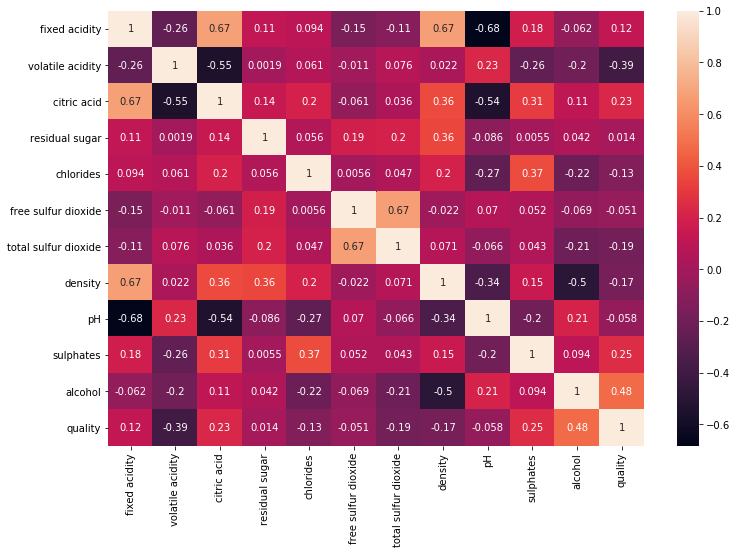

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

The target variable 'quality' is having highest correlation with 'alcohol' and least correlation with 'residual sugar' and 'free sulfur dioxide'.
Also 'volatile acidity' is having high negative correlation with quality

Checking for outliers

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

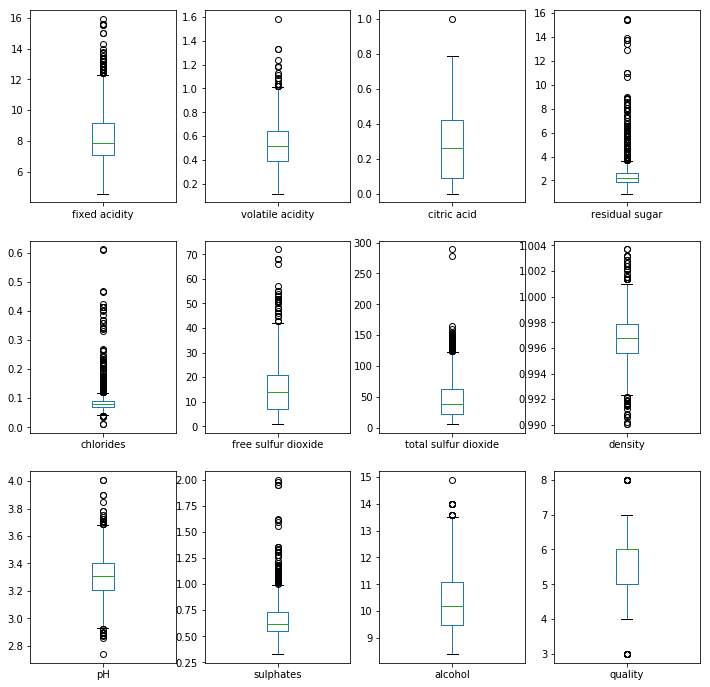

In [12]:
df.plot.box(subplots=True,layout=(3,4),figsize=(12,12))

From the above plots it can be seen that almost all the independent variables have outliers.
Alcohol and Citric Acid have few outliers

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


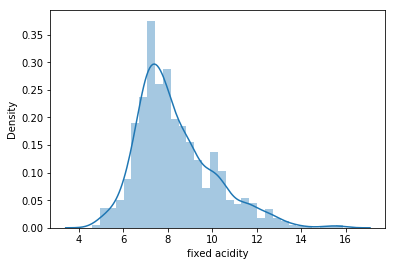

In [13]:
sns.distplot(df['fixed acidity'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


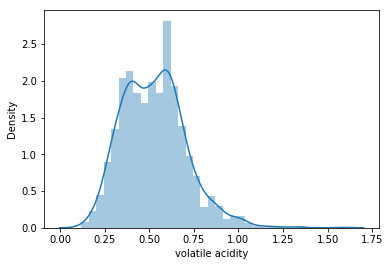

In [14]:
sns.distplot(df['volatile acidity'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


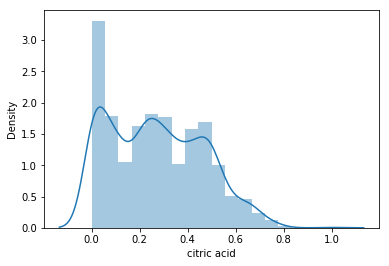

In [15]:
sns.distplot(df['citric acid'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


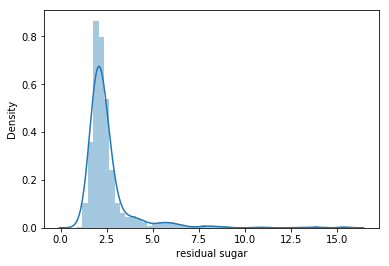

In [16]:
sns.distplot(df['residual sugar'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


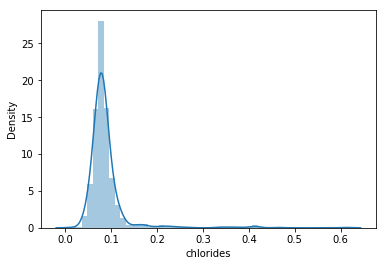

In [17]:
sns.distplot(df['chlorides'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


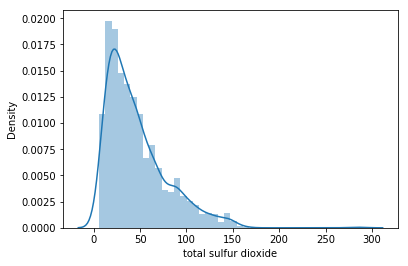

In [18]:
sns.distplot(df['total sulfur dioxide'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


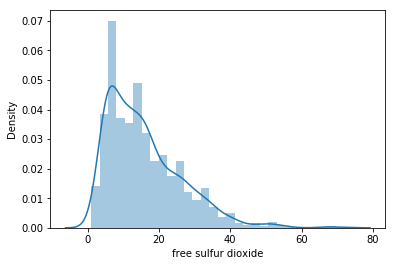

In [19]:
sns.distplot(df['free sulfur dioxide'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


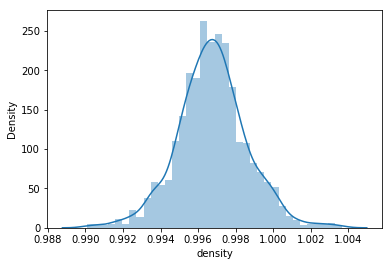

In [20]:
sns.distplot(df['density'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


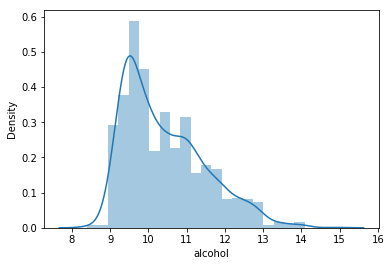

In [21]:
sns.distplot(df['alcohol'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


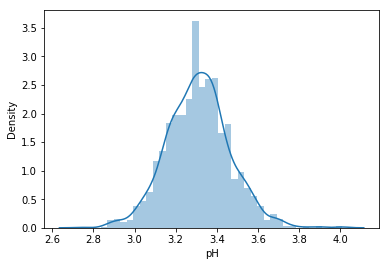

In [22]:
sns.distplot(df['pH'])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


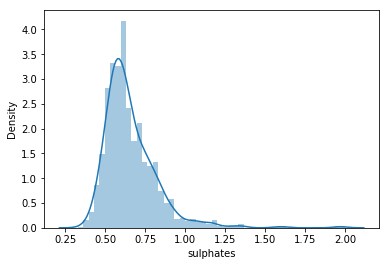

In [23]:
sns.distplot(df['sulphates'])

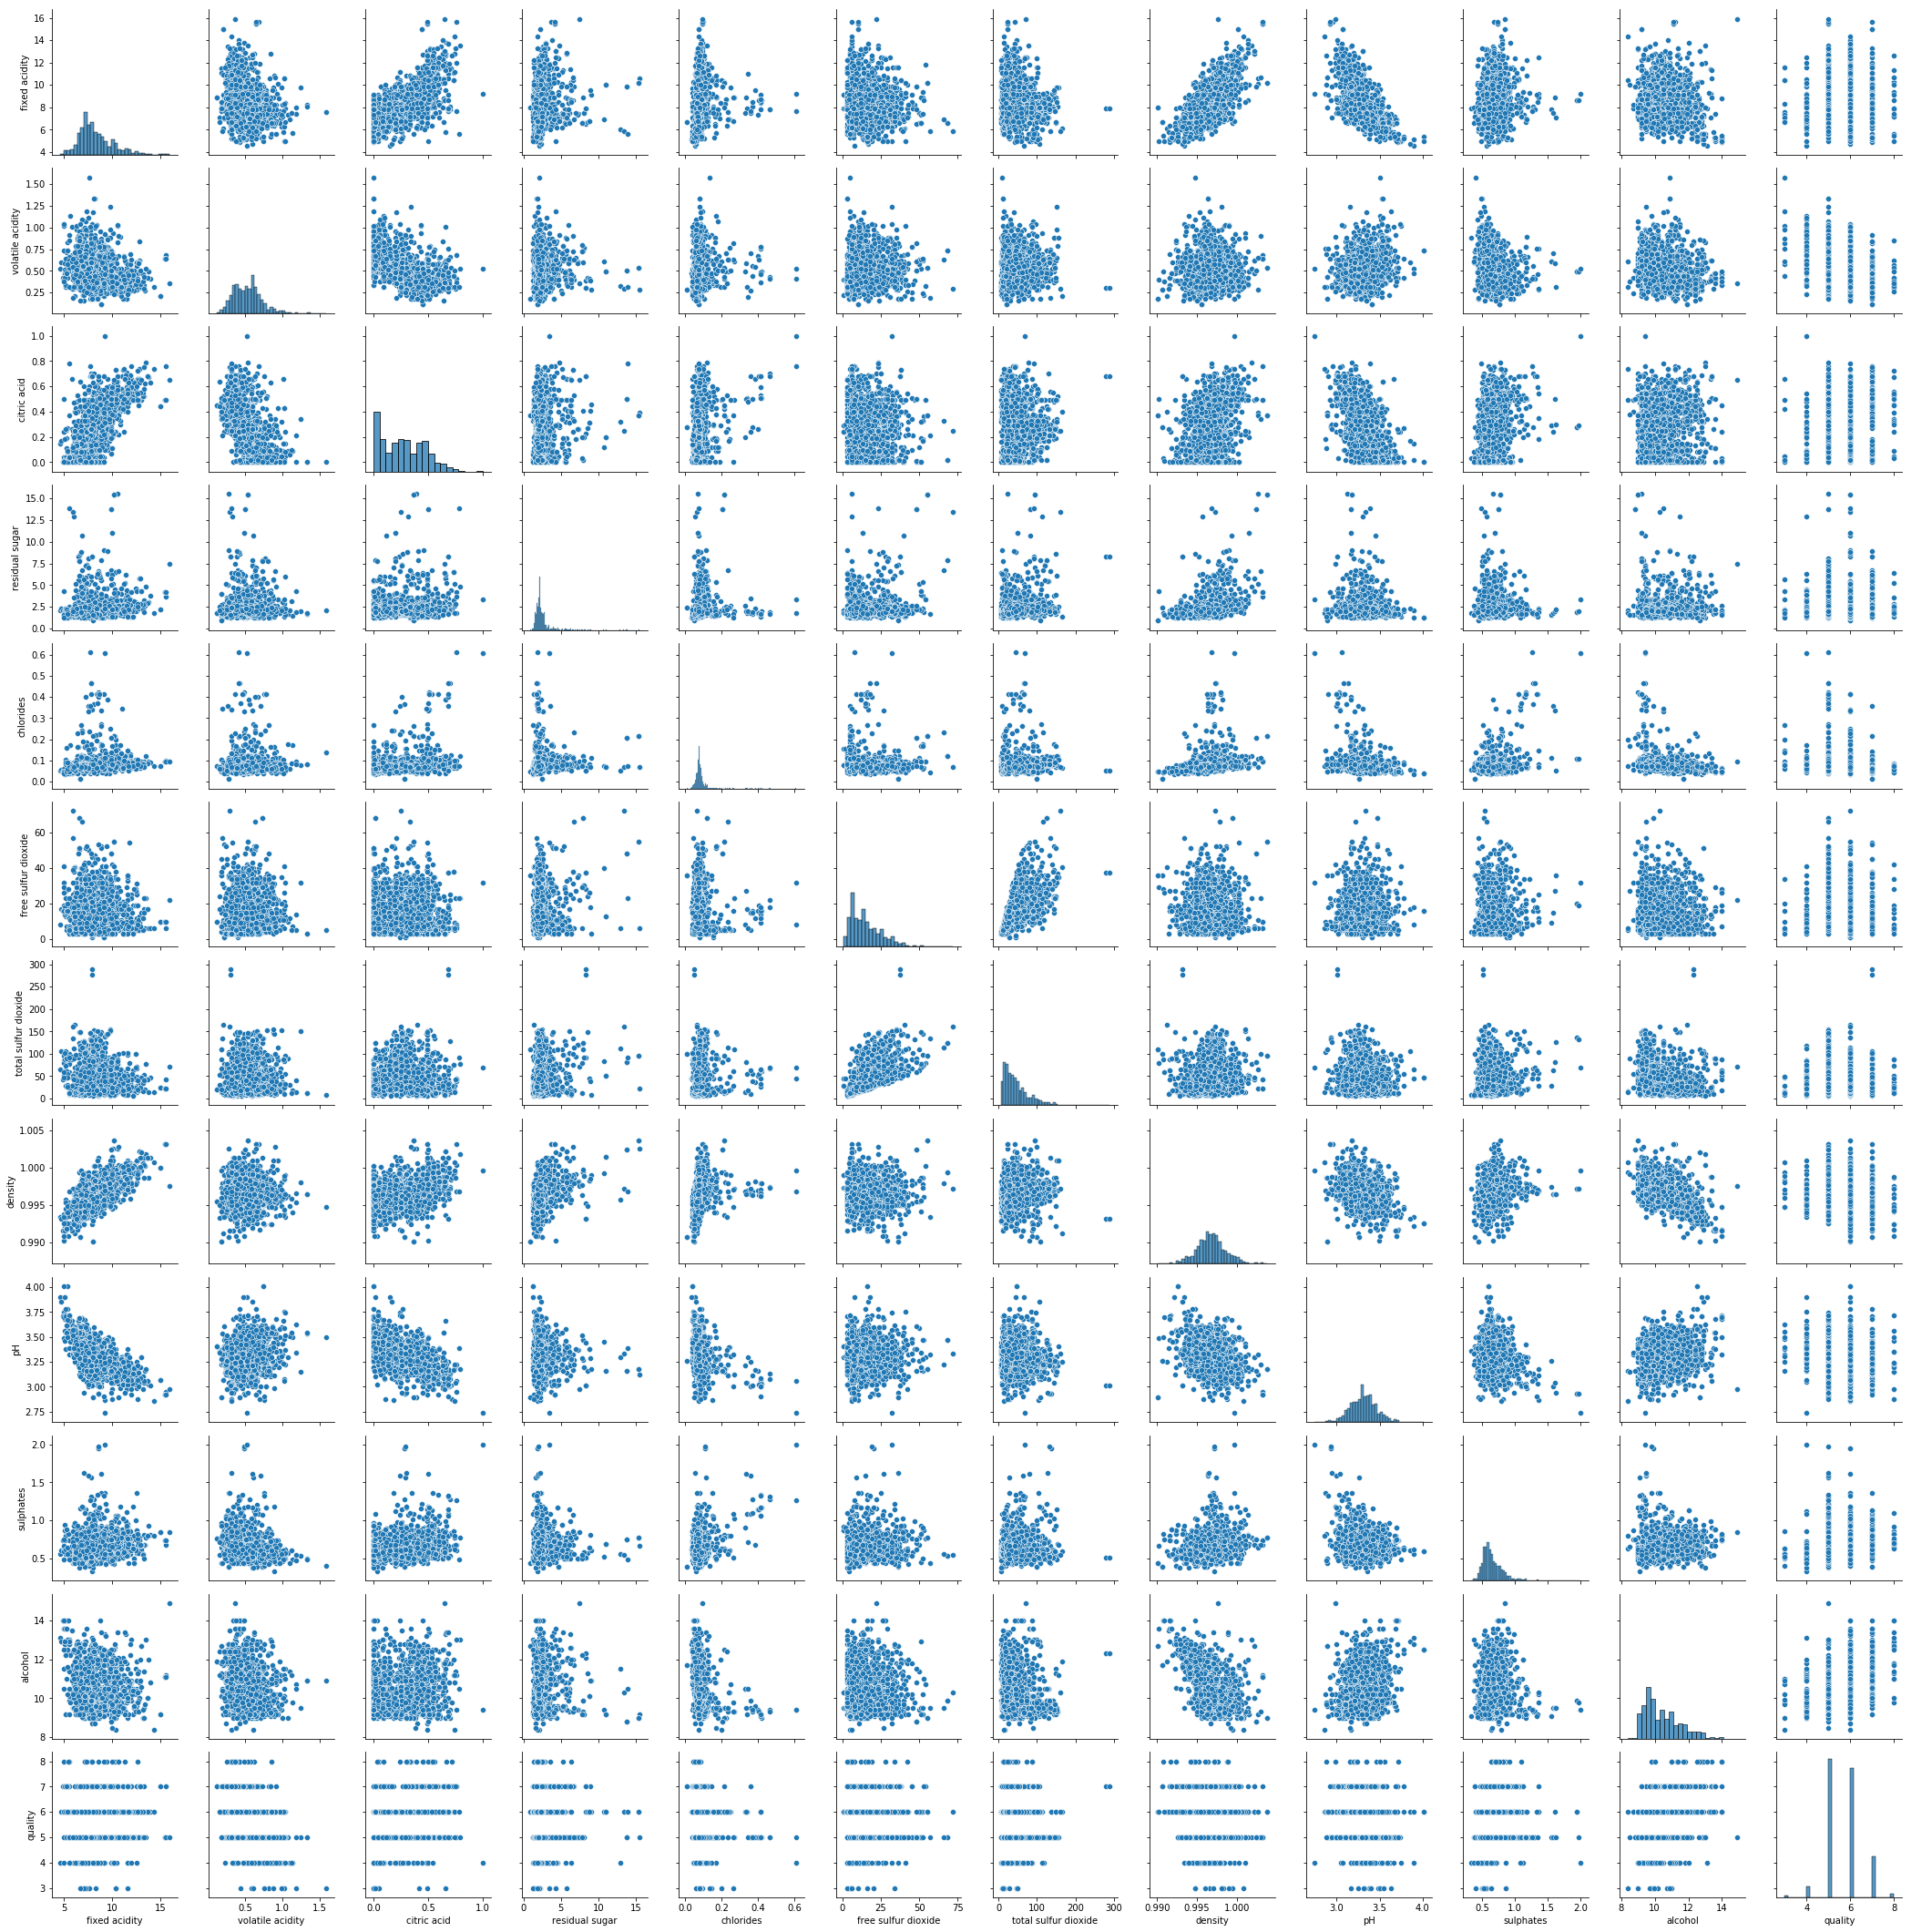

In [24]:
sns.pairplot(df)

As volatile acidity is having high negative correlation with quality, drop the column

In [25]:
df.drop('volatile acidity',axis=1,inplace=True)

In [26]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Removing outliers using zscore

df_new is the dataframe after removing outliers

In [27]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [28]:
df.shape

(1599, 11)

In [29]:
df_new.shape

(1458, 11)

In [30]:
(1599-1458)/1599

0.08818011257035648

In [31]:
df_new.skew(axis=0)

fixed acidity           0.827264
citric acid             0.297781
residual sugar          2.457646
chlorides               2.288587
free sulfur dioxide     0.873162
total sulfur dioxide    1.183539
density                 0.061110
pH                      0.109577
sulphates               0.891997
alcohol                 0.754976
quality                 0.400875
dtype: float64

Dividing the data into dependent and independent variables

In [32]:
#independent features
x=df_new.iloc[:,:-1]

#dependent features
y=df_new.iloc[:,-1]

Transforming data to remove skewness

In [33]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\dravi\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [35]:
x

array([[-0.46531304, -1.52179499, -0.60699518, ...,  1.35472616,
        -0.58214208, -1.12084644],
       [-0.16806727, -1.52179499,  0.65224299, ..., -0.82077427,
         0.45668225, -0.53203934],
       [-0.16806727, -1.24125263,  0.21101302, ..., -0.38617329,
         0.22572251, -0.53203934],
       ...,
       [-1.44922717, -0.66001353,  0.21101302, ...,  0.74054165,
         0.93435865,  0.74129668],
       [-1.88412706, -0.72146733, -0.37111918, ...,  1.7567213 ,
         0.67127261, -0.03633508],
       [-1.77077959,  1.07540664,  1.5464447 , ...,  0.5327437 ,
         0.30462192,  0.74129668]])

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


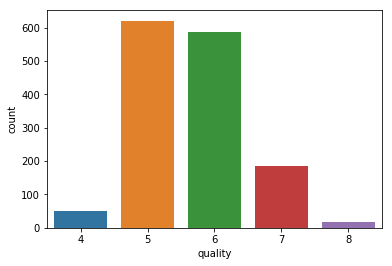

In [36]:
sns.countplot(y)

As can be seen from the countplot there is imbalance in the target variable quality.
Imbalance has to be removed

In [37]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)

In [38]:
y1.value_counts()

7    621
5    621
8    621
6    621
4    621
Name: quality, dtype: int64

C:\Users\dravi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


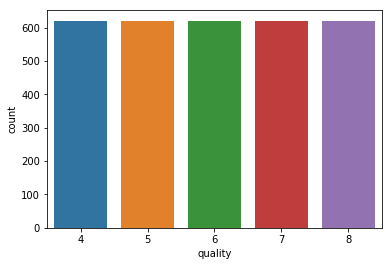

In [39]:
sns.countplot(y1)

Applying Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.4,random_state=45)
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

pd=dtc.predict(xtest)
print('accuracy score',accuracy_score(ytest,pd))
confusion_matrix(ytest,pd)

accuracy score 0.7423510466988728


array([[236,  17,  13,   0,   0],
       [ 22, 153,  60,  10,   1],
       [ 14,  62, 125,  31,  12],
       [  1,  10,  37, 183,  20],
       [  0,   0,   5,   5, 225]], dtype=int64)

Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x1,y1,cv=5)
print(score.mean())

0.7075684380032207


KNN classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print('accuracy_score',accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

accuracy_score 0.7407407407407407
[[259   3   3   1   0]
 [ 50 134  45  14   3]
 [ 40  49  91  46  18]
 [  9   9  11 205  17]
 [  0   0   0   4 231]]
              precision    recall  f1-score   support

           4       0.72      0.97      0.83       266
           5       0.69      0.54      0.61       246
           6       0.61      0.37      0.46       244
           7       0.76      0.82      0.79       251
           8       0.86      0.98      0.92       235

    accuracy                           0.74      1242
   macro avg       0.73      0.74      0.72      1242
weighted avg       0.73      0.74      0.72      1242



Cross Validation

In [43]:
score=cross_val_score(knn,x1,y1,cv=5)
print(score.mean())

0.7162640901771337


Support Vector Machine Classifier

In [44]:
from sklearn.svm import SVC
svcp=SVC(kernel='poly')
svcp.fit(xtrain,ytrain)
svcp.score(xtrain,ytrain)
predsvcp=svcp.predict(xtest)
print('accuracy_score',accuracy_score(ytest,predsvcp))
print(confusion_matrix(ytest,predsvcp))
print(classification_report(ytest,predsvcp))

accuracy_score 0.6843800322061192
[[195  56  15   0   0]
 [ 24 137  77   5   3]
 [ 22  57 126  27  12]
 [  1   4  59 164  23]
 [  0   0   0   7 228]]
              precision    recall  f1-score   support

           4       0.81      0.73      0.77       266
           5       0.54      0.56      0.55       246
           6       0.45      0.52      0.48       244
           7       0.81      0.65      0.72       251
           8       0.86      0.97      0.91       235

    accuracy                           0.68      1242
   macro avg       0.69      0.69      0.69      1242
weighted avg       0.69      0.68      0.69      1242



Cross Validation

In [45]:
score=cross_val_score(svcp,x1,y1,cv=5)
print(score.mean())

0.6930756843800323


From the above it can be seen that SVM classifier is the best model. 
The difference between accuracy score and cross validation score is less for SVM

# Saving the best model

In [46]:
import joblib
joblib.dump(svcp,'svcpfile.obj')
svcp_from_joblib=joblib.load('svcpfile.obj')
svcp_from_joblib.predict(xtest)

array([5, 4, 4, ..., 7, 4, 8], dtype=int64)